<a href="https://colab.research.google.com/github/Harsh-Gopal/shopping_trends/blob/main/Shoppping_Trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Identifying Shopping Trends using Data Analysis**

<div style="color: White; display: fill;
            border-radius: 5px;
            background-color: #123456;
            font-size: 100%;
            font-family: Verdana">

<p style="padding: 7px; color: Black;">
      <ul>  
        ◆ <b>InvoiceNo</b> - Unique identifier for each invoice.<br>
        ◆ <b>StockCode</b> - Unique code for each product.<br>
        ◆ <b>Description</b> - Description of the purchased product.<br>
        ◆ <b>Quantity</b> - Number of units purchased.<br>
        ◆ <b>InvoiceDate</b> - Date and time of the purchase.<br>
        ◆ <b>UnitPrice</b> - Price per unit of the purchased item.<br>
        ◆ <b>CustomerID</b> - Unique identifier for each customer.<br>
        ◆ <b>Country</b> - Country where the purchase was made.<br>
        ◆ <b>Discount</b> - Discount applied to the purchase.<br>
        ◆ <b>PaymentMethod</b> - Customer's preferred payment method.<br>
        ◆ <b>ShippingCost</b> - Cost of shipping for the order.<br>
        ◆ <b>Category</b> - Category of the purchased product.<br>
        ◆ <b>SalesChannel</b> - Indicates if the purchase was made online or in-store.<br>
        ◆ <b>ReturnStatus</b> - Status indicating whether the item was returned.<br>
        ◆ <b>ShipmentProvider</b> - Logistics provider handling the shipment.<br>
        ◆ <b>WarehouseLocation</b> - The warehouse from which the product was shipped.<br>
        ◆ <b>OrderPriority</b> - Priority level assigned to the order (e.g., High, Medium, Low).<br><br>
    <p style = "padding: 3px; color: Black;">
</p>
</div>


In [84]:
!pip install WordCloud

In [85]:
# Importing libraries
import numpy as np # Importing the numpy library for array operations and mathematical functions
import pandas as pd # Use for exploring the data
import seaborn as sns # It has also plot
import matplotlib.pyplot as plt # For some extra plot functions
import plotly.express as px # This library can makes interactive plots


In [86]:
# Reading the data set
shop = pd.read_csv('online_sales_dataset.csv')

In [87]:
shop.shape

(49782, 17)

In [88]:
shop.to_excel('online_sales_dataset.xlsx')


In [89]:
shop.dtypes

,0
InvoiceNo,int64
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object
Discount,float64
PaymentMethod,object


In [90]:
# It shows the names of the columns
shop.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Discount', 'PaymentMethod',
       'ShippingCost', 'Category', 'SalesChannel', 'ReturnStatus',
       'ShipmentProvider', 'WarehouseLocation', 'OrderPriority'],
      dtype='object')

In [91]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

In [92]:
shop.shape

(49782, 17)

In [93]:
shop.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,4978
Country,0
Discount,0
PaymentMethod,0


In [94]:
# Print unique values for selected columns in the dataset
print(f"The unique values of the 'Country' column are: {shop['Country'].unique()}")
print()  # Blank line

print(f"The unique values of the 'Category' column are: {shop['Category'].unique()}")
print()  # Blank line

print(f"The unique values of the 'SalesChannel' column are: {shop['SalesChannel'].unique()}")
print()  # Blank line

print(f"The unique values of the 'ReturnStatus' column are: {shop['ReturnStatus'].unique()}")
print()  # Blank line

print(f"The unique values of the 'ShipmentProvider' column are: {shop['ShipmentProvider'].unique()}")
print()  # Blank line

print(f"The unique values of the 'OrderPriority' column are: {shop['OrderPriority'].unique()}")
print()  # Blank line

print(f"The unique values of the 'Discount' column are: {shop['Discount'].unique()}")
print()  # Blank line

print(f"The unique values of the 'PaymentMethod' column are: {shop['PaymentMethod'].unique()}")


The unique values of the 'Country' column are: ['Australia' 'Spain' 'Germany' 'Netherlands' 'United Kingdom' 'Sweden'
 'Belgium' 'Norway' 'Italy' 'Portugal' 'France' 'United States']

The unique values of the 'Category' column are: ['Apparel' 'Electronics' 'Accessories' 'Stationery' 'Furniture']

The unique values of the 'SalesChannel' column are: ['In-store' 'Online']

The unique values of the 'ReturnStatus' column are: ['Not Returned' 'Returned']

The unique values of the 'ShipmentProvider' column are: ['UPS' 'Royal Mail' 'FedEx' 'DHL']

The unique values of the 'OrderPriority' column are: ['Medium' 'High' 'Low']

The unique values of the 'Discount' column are: [0.47       0.19       0.35       ... 1.56908153 1.4206646  1.13986873]

The unique values of the 'PaymentMethod' column are: ['Bank Transfer' 'paypall' 'Credit Card']


# **OBSERVATION:**
Upon examining the dataset, we find that it consists of 49,782 rows and 17 columns. This dataset is well-structured and appears to contain essential information for analyzing online shopping trends.

Understanding the Columns:
- **InvoiceNo:** Unique identifier for each transaction, allowing us to track purchases.
- **StockCode:** Unique product identifier, helping in distinguishing different items.
- **Description:** Name or description of the purchased product, useful for understanding product preferences.
Quantity: Number of units purchased in a transaction, allowing demand analysis.
- **InvoiceDate:** Date and time of the purchase, useful for identifying shopping trends over time.
UnitPrice: Price per unit of the purchased item, enabling revenue and pricing analysis.
- **CustomerID:** Unique identifier for each customer, helping in customer segmentation.
Country: Location where the purchase was made, useful for regional trend analysis.
- **Discount:** Discount applied to the purchase, allowing us to analyze the impact of promotions.
PaymentMethod: The method used by the customer to complete the purchase (e.g., Credit Card, PayPal).
- **ShippingCost:** Cost incurred for shipping, helping in understanding logistics expenses.
- **Category:** The product category (e.g., Electronics, Apparel, Stationery), aiding in category-based analysis.
- **SalesChannel:** Whether the transaction was online or in-store, useful for understanding customer preferences.
- **ReturnStatus:** Indicates whether the product was returned or not, useful for return rate analysis.
- **ShipmentProvider:** The logistics company handling the shipment (e.g., DHL, FedEx, UPS).
- **WarehouseLocation:** The warehouse from which the product was shipped, helping in supply chain analysis.
- **OrderPriority: ** The priority level of the order (High, Medium, Low), useful for analyzing order fulfillment urgency.

With this rich and diverse dataset, we can explore customer shopping behaviors, analyze seasonal and regional trends, and understand pricing, discounts, and return rates. The dataset provides a great foundation for performing Exploratory Data Analysis (EDA), customer segmentation, and predictive analytics.

## 1. What is the overall distribution of order priorities (High, Medium, Low) in the dataset?

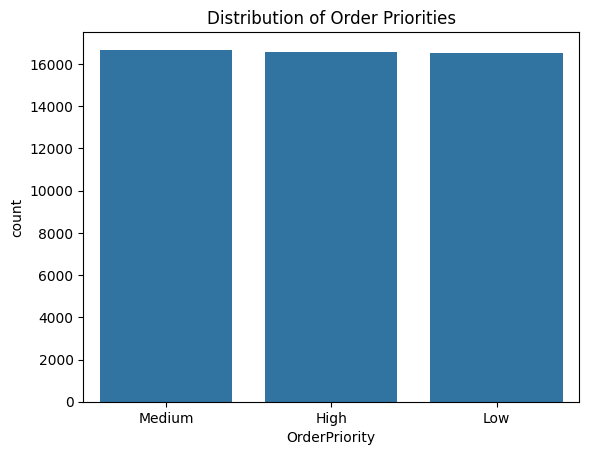

OrderPriority
Medium    16678
High      16562
Low       16542
Name: count, dtype: int64


In [95]:
# Distribution of order priorities
order_priority_distribution = shop['OrderPriority'].value_counts()

# Plotting
sns.countplot(x='OrderPriority', data=shop)
plt.title('Distribution of Order Priorities')
plt.show()

# Display the value counts
print(order_priority_distribution)


## 2. How does the average purchase amount (Quantity × UnitPrice) vary across different product categories?

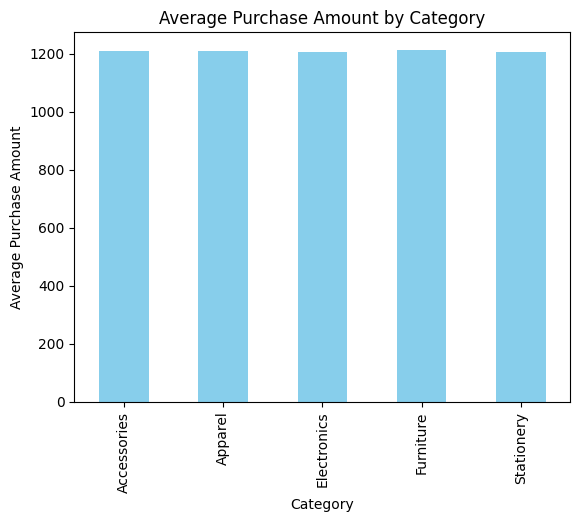

Category
Accessories    1207.755599
Apparel        1209.443412
Electronics    1205.427170
Furniture      1213.338375
Stationery     1204.554771
Name: PurchaseAmount, dtype: float64


In [96]:
# Calculate the purchase amount
shop['PurchaseAmount'] = shop['Quantity'] * shop['UnitPrice']

# Average purchase amount by category
avg_purchase_by_category = shop.groupby('Category')['PurchaseAmount'].mean()

# Plotting
avg_purchase_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Purchase Amount by Category')
plt.xlabel('Category')
plt.ylabel('Average Purchase Amount')
plt.show()

# Display the result
print(avg_purchase_by_category)


## 3. Which country has the highest number of purchases?

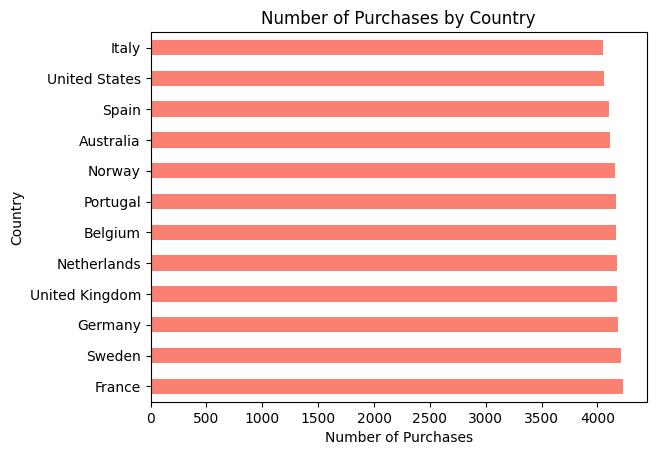

Country
France            4230
Sweden            4211
Germany           4182
United Kingdom    4180
Netherlands       4173
Belgium           4170
Portugal          4163
Norway            4157
Australia         4110
Spain             4100
United States     4058
Italy             4048
Name: count, dtype: int64


In [97]:
# Count the number of purchases per country
country_purchases = shop['Country'].value_counts()

# Plotting
country_purchases.plot(kind='barh', color='salmon')
plt.title('Number of Purchases by Country')
plt.xlabel('Number of Purchases')
plt.ylabel('Country')
plt.show()

# Display the result
print(country_purchases)


## 4. What are the most commonly purchased items in each product category?

In [98]:
# Most commonly purchased items by category
most_common_items_by_category = shop.groupby('Category')['Description'].apply(lambda x: x.mode()[0])

# Display the result
print(most_common_items_by_category)


Category
Accessories    Wall Clock
Apparel        Headphones
Electronics     USB Cable
Furniture        Backpack
Stationery     Wall Clock
Name: Description, dtype: object


## 5. Are there specific seasons or months where customer spending is significantly higher?


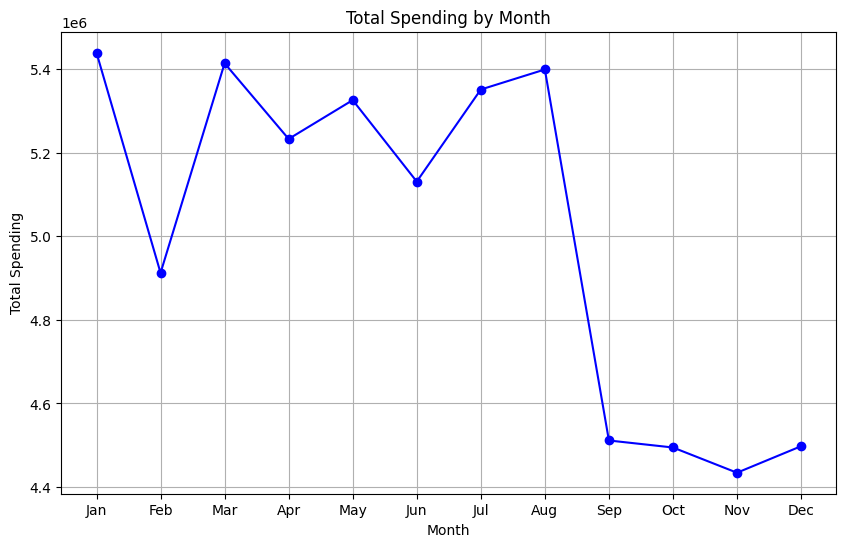

Monthly Spending Distribution:
Month
1     5439090.76
2     4912296.45
3     5413847.12
4     5232818.51
5     5325693.90
6     5130827.02
7     5351044.55
8     5398988.96
9     4511390.46
10    4494615.67
11    4434258.58
12    4497661.11
Name: TotalSpending, dtype: float64

Seasonal Spending Distribution:
Season
Fall      13440264.71
Spring    15972359.53
Summer    15880860.53
Winter    14849048.32
Name: TotalSpending, dtype: float64


In [99]:
# Convert 'InvoiceDate' column to datetime format if it's not already
shop['InvoiceDate'] = pd.to_datetime(shop['InvoiceDate'], errors='coerce')

# Extract Month from the InvoiceDate
shop['Month'] = shop['InvoiceDate'].dt.month

# Define seasons based on months
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create a new column for the season
shop['Season'] = shop['Month'].apply(get_season)

# Calculate the total spending per month or season
shop['TotalSpending'] = shop['Quantity'] * shop['UnitPrice']

# Group by month or season and calculate the total spending
monthly_spending = shop.groupby('Month')['TotalSpending'].sum()
seasonal_spending = shop.groupby('Season')['TotalSpending'].sum()

# Plotting for Monthly Spending
plt.figure(figsize=(10,6))
monthly_spending.plot(kind='line', color='b', marker='o')
plt.title('Total Spending by Month')
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.grid(True)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Plotting for Seasonal Spending using Plotly Sunburst
import plotly.express as px

# Plotting Seasonal Spending
fig = px.sunburst(seasonal_spending.reset_index(),
                  path=['Season'],
                  values='TotalSpending',
                  title='Total Spending by Season')
fig.show()

# Display the result
print("Monthly Spending Distribution:")
print(monthly_spending)

print("\nSeasonal Spending Distribution:")
print(seasonal_spending)


## 6. How does the return rate vary across different product categories?

In [100]:
# Convert 'InvoiceDate' to datetime if it's not already in datetime format
shop['InvoiceDate'] = pd.to_datetime(shop['InvoiceDate'])

# Extract Month from the InvoiceDate
shop['Month'] = shop['InvoiceDate'].dt.month

# Calculate total spending per month
shop['MonthlySpending'] = shop['Quantity'] * shop['UnitPrice']

# Group by month and calculate the total spending for each month
monthly_spending = shop.groupby('Month')['MonthlySpending'].sum().reset_index()

# Plot the total spending per month
import plotly.express as px
fig = px.line(monthly_spending, x='Month', y='MonthlySpending', title='Monthly Spending Trend')
fig.show()


## 7. Are there any notable differences in purchase behavior between online and in-store sales channels?

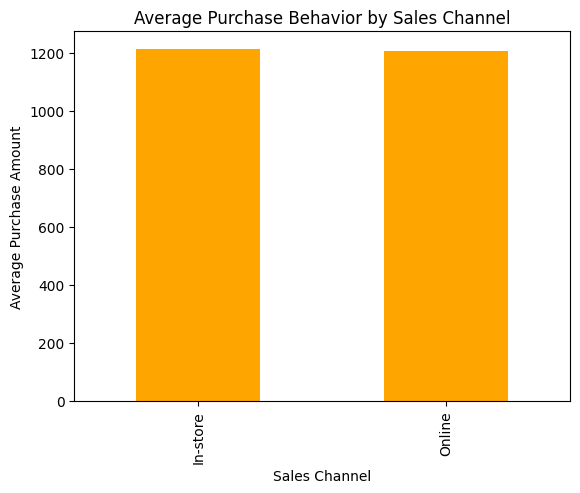

SalesChannel
In-store    1212.319804
Online      1203.969982
Name: PurchaseAmount, dtype: float64


In [101]:
# Average purchase amount by sales channel
purchase_behavior_by_channel = shop.groupby('SalesChannel')['PurchaseAmount'].mean()

# Plotting
purchase_behavior_by_channel.plot(kind='bar', color='orange')
plt.title('Average Purchase Behavior by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Average Purchase Amount')
plt.show()

# Display the result
print(purchase_behavior_by_channel)


## 8.Which payment method is the most popular among customers?

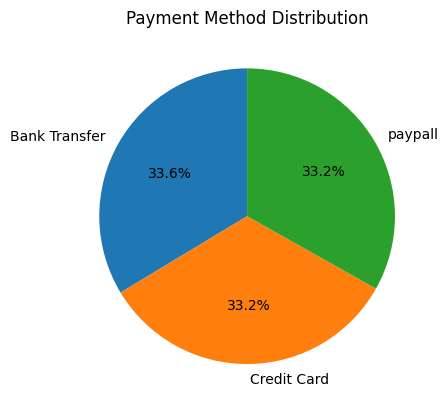

PaymentMethod
Bank Transfer    16747
Credit Card      16530
paypall          16505
Name: count, dtype: int64


In [102]:
# Count payment method occurrences
payment_method_distribution = shop['PaymentMethod'].value_counts()

# Plotting
payment_method_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Payment Method Distribution')
plt.ylabel('')  # Hide the y-axis label
plt.show()

# Display the result
print(payment_method_distribution)


## 9. Do customers who receive discounts tend to spend more than those who don't?

In [103]:
# Plotting a Pie Chart to visualize the distribution of spending based on discount status
import plotly.express as px

fig = px.pie(discount_spending.reset_index(), names='Discount', values='PurchaseAmount',
             color='Discount',
             labels={'Discount': 'Discount Status', 'PurchaseAmount': 'Total Spending'},
             title='Total Spending Distribution by Discount Status')

fig.update_layout(xaxis_tickmode='array', xaxis_tickvals=[0, 1], xaxis_ticktext=['No Discount', 'With Discount'])
fig.show()

# Display the result in the console
print(discount_spending)


Discount
False      634677.91
True     59507855.18
Name: PurchaseAmount, dtype: float64


## 10. How does the frequency of purchases vary across different countries?


<ipython-input-104-ff8fa2ae52e2>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




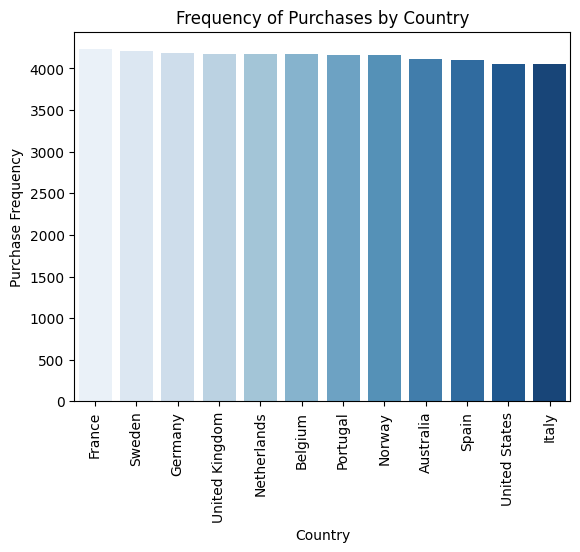

Country
France            4230
Sweden            4211
Germany           4182
United Kingdom    4180
Netherlands       4173
Belgium           4170
Portugal          4163
Norway            4157
Australia         4110
Spain             4100
United States     4058
Italy             4048
Name: count, dtype: int64


In [104]:
# Frequency of purchases by country
country_purchase_frequency = shop['Country'].value_counts()

# Plotting
sns.barplot(x=country_purchase_frequency.index, y=country_purchase_frequency.values, palette='Blues')
plt.title('Frequency of Purchases by Country')
plt.xlabel('Country')
plt.ylabel('Purchase Frequency')
plt.xticks(rotation=90)
plt.show()

# Display the result
print(country_purchase_frequency)


##11. Are there any correlations between shipping cost and order priority?

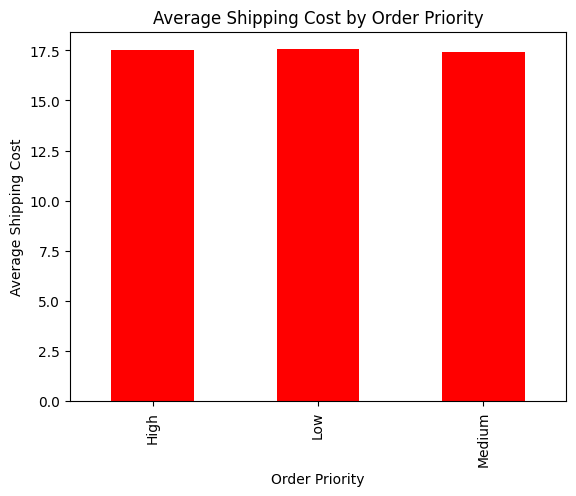

OrderPriority
High      17.536817
Low       17.553980
Medium    17.393376
Name: ShippingCost, dtype: float64


In [105]:
# Average shipping cost by order priority
shipping_cost_by_priority = shop.groupby('OrderPriority')['ShippingCost'].mean()

# Plotting
shipping_cost_by_priority.plot(kind='bar', color='red')
plt.title('Average Shipping Cost by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Average Shipping Cost')
plt.show()

# Display the result
print(shipping_cost_by_priority)


## 12. Which shipment provider is preferred for different product categories?

In [106]:
# Most common shipment provider by category
shipment_provider_by_category = shop.groupby('Category')['ShipmentProvider'].apply(lambda x: x.mode()[0])

# Display the result
print(shipment_provider_by_category)


Category
Accessories    FedEx
Apparel          DHL
Electronics    FedEx
Furniture        UPS
Stationery       UPS
Name: ShipmentProvider, dtype: object


## 13. How does the presence of a discount affect the purchase decision of customers?

<ipython-input-125-1682a6de9785>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




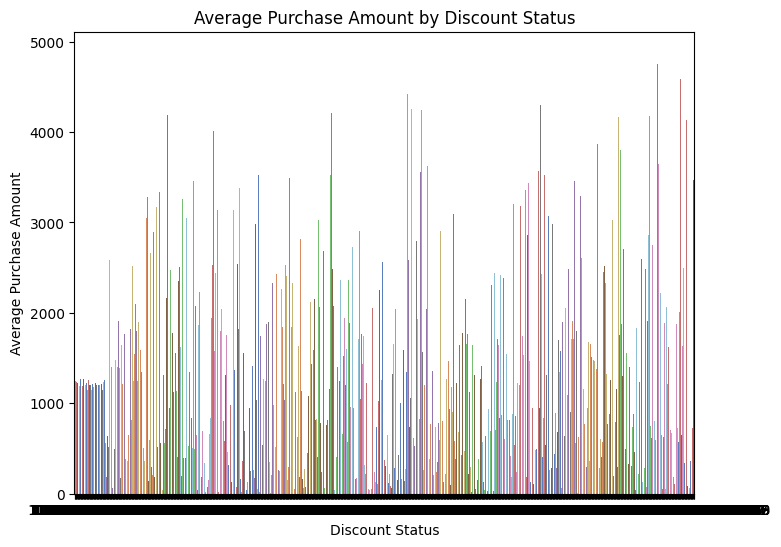

      Discount  PurchaseAmount
0     0.000000     1274.453635
1     0.010000     1240.865316
2     0.020000     1196.686939
3     0.030000     1234.392086
4     0.040000     1191.425125
...        ...             ...
1042  1.998808      613.480000
1043  1.998878      724.680000
1044  1.998946     2074.600000
1045  1.999605     3466.230000
1046  1.999764      224.200000

[1047 rows x 2 columns]


In [125]:
# Calculate the average purchase amount with and without discount
purchase_by_discount = shop.groupby('Discount')['PurchaseAmount'].mean().reset_index()

# Plotting with Seaborn barplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(x='Discount', y='PurchaseAmount', data=purchase_by_discount, palette='muted')
plt.title('Average Purchase Amount by Discount Status')
plt.xlabel('Discount Status')
plt.ylabel('Average Purchase Amount')
plt.show()

# Display the result
print(purchase_by_discount)


## 14. Are there any specific product descriptions that appear frequently in high-priority orders?

In [108]:
# Filter for high-priority orders
high_priority_orders = shop[shop['OrderPriority'] == 'High']

# Most common descriptions in high-priority orders
common_descriptions_high_priority = high_priority_orders['Description'].value_counts().head(10)

# Display the result
print(common_descriptions_high_priority)


Description
Headphones        1567
Blue Pen          1539
Backpack          1538
USB Cable         1534
Office Chair      1502
Notebook          1502
Wireless Mouse    1498
Wall Clock        1495
T-shirt           1485
Desk Lamp         1458
Name: count, dtype: int64


## 15. What is the average number of items purchased per transaction?

In [109]:
# Average number of items purchased per transaction
avg_items_per_transaction = shop.groupby('InvoiceNo')['Quantity'].sum().mean()

# Display the result
print(f"Average number of items purchased per transaction: {avg_items_per_transaction}")


Average number of items purchased per transaction: 22.966552563203695


## 16. How does the purchase amount differ based on return status?

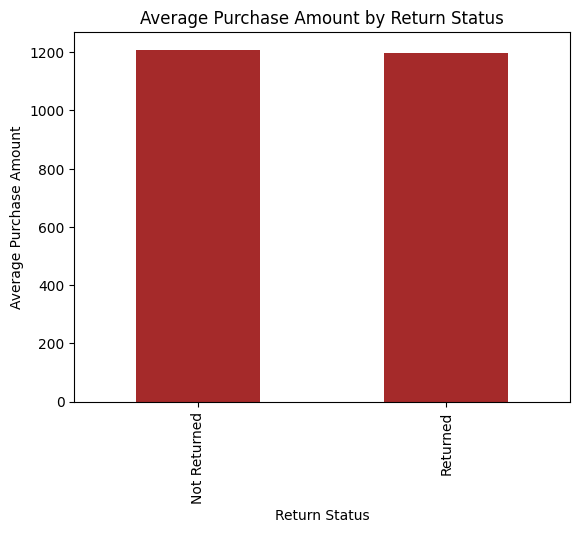

ReturnStatus
Not Returned    1209.212480
Returned        1198.079951
Name: PurchaseAmount, dtype: float64


In [110]:
# Average purchase amount by return status
purchase_by_return_status = shop.groupby('ReturnStatus')['PurchaseAmount'].mean()

# Plotting
purchase_by_return_status.plot(kind='bar', color='brown')
plt.title('Average Purchase Amount by Return Status')
plt.xlabel('Return Status')
plt.ylabel('Average Purchase Amount')
plt.show()

# Display the result
print(purchase_by_return_status)


## 17. Are there any noticeable differences in purchase behavior between different warehouse locations?

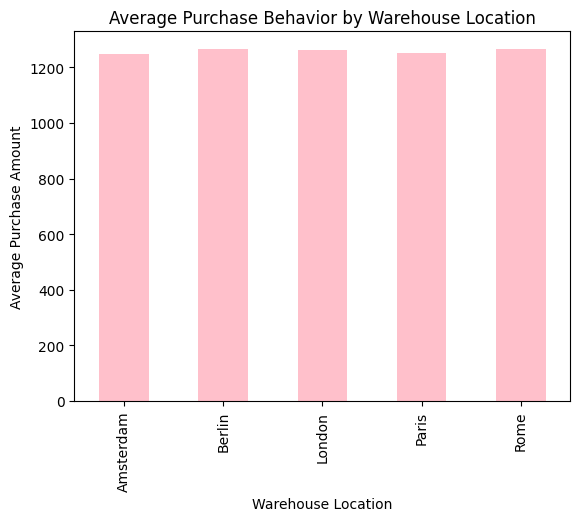

WarehouseLocation
Amsterdam    1248.680177
Berlin       1266.192288
London       1262.919585
Paris        1250.536528
Rome         1265.584705
Name: PurchaseAmount, dtype: float64


In [111]:
# Average purchase amount by warehouse location
purchase_by_warehouse = shop.groupby('WarehouseLocation')['PurchaseAmount'].mean()

# Plotting
purchase_by_warehouse.plot(kind='bar', color='pink')
plt.title('Average Purchase Behavior by Warehouse Location')
plt.xlabel('Warehouse Location')
plt.ylabel('Average Purchase Amount')
plt.show()

# Display the result
print(purchase_by_warehouse)


## 18. Is there a relationship between product category and the likelihood of a return?

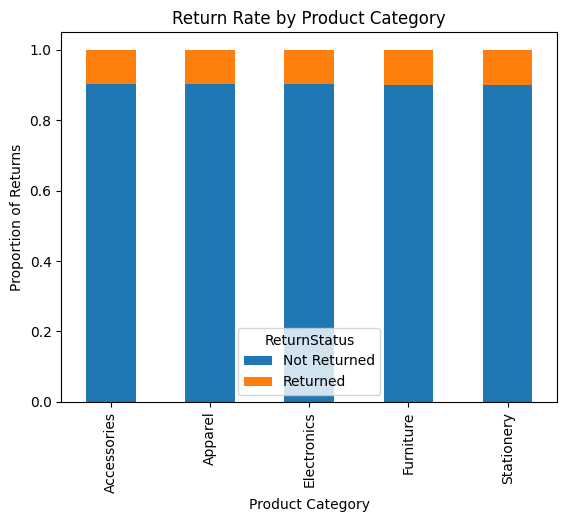

ReturnStatus  Not Returned  Returned
Category                            
Accessories       0.903258  0.096742
Apparel           0.902372  0.097628
Electronics       0.901621  0.098379
Furniture         0.900436  0.099564
Stationery        0.900786  0.099214


In [112]:
# Return rate by category
return_rate_by_category = shop.groupby('Category')['ReturnStatus'].value_counts(normalize=True).unstack()

# Plotting
return_rate_by_category.plot(kind='bar', stacked=True)
plt.title('Return Rate by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Proportion of Returns')
plt.show()

# Display the result
print(return_rate_by_category)


## 19. How does the average purchase amount differ between different sales channels?

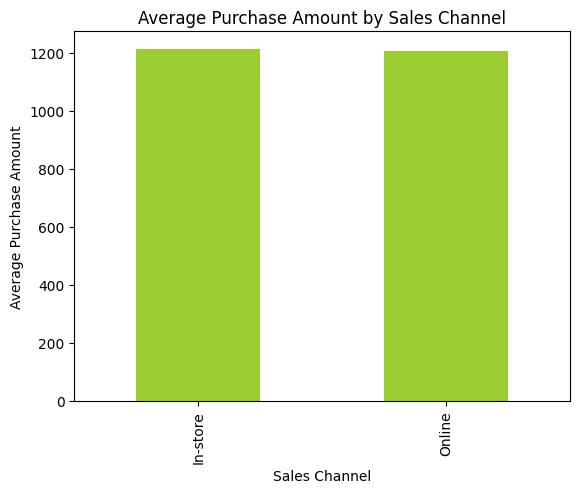

SalesChannel
In-store    1212.319804
Online      1203.969982
Name: PurchaseAmount, dtype: float64


In [113]:
# Average purchase amount by sales channel
purchase_by_sales_channel = shop.groupby('SalesChannel')['PurchaseAmount'].mean()

# Plotting
purchase_by_sales_channel.plot(kind='bar', color='yellowgreen')
plt.title('Average Purchase Amount by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Average Purchase Amount')
plt.show()

# Display the result
print(purchase_by_sales_channel)


## 20. Which country contributes the most to total revenue (Quantity × UnitPrice)?

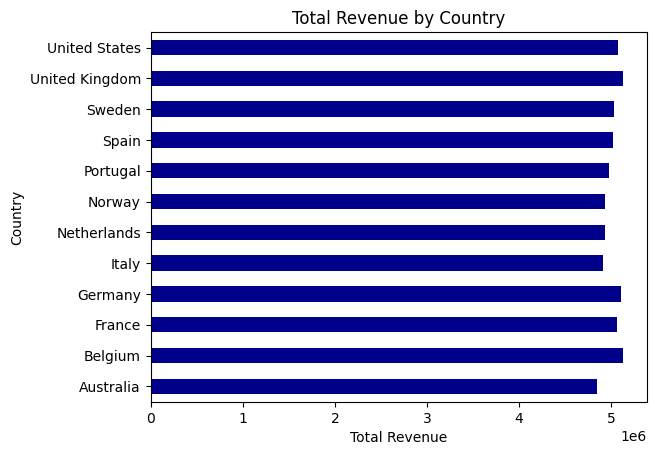

Country
Australia         4846793.98
Belgium           5124058.22
France            5063516.55
Germany           5111343.36
Italy             4909348.59
Netherlands       4934815.54
Norway            4930232.35
Portugal          4974618.96
Spain             5014548.62
Sweden            5028849.94
United Kingdom    5128232.81
United States     5076174.17
Name: PurchaseAmount, dtype: float64


In [114]:
# Total revenue by country
total_revenue_by_country = shop.groupby('Country')['PurchaseAmount'].sum()

# Plotting
total_revenue_by_country.plot(kind='barh', color='darkblue')
plt.title('Total Revenue by Country')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.show()

# Display the result
print(total_revenue_by_country)


## 21. How does shipping cost vary across different product categories?

In [115]:
# Average shipping cost by category
shipping_cost_by_category = shop.groupby('Category')['ShippingCost'].mean()

# Plotting
fig = px.bar(shipping_cost_by_category, x=shipping_cost_by_category.index, y=shipping_cost_by_category.values,
             title='Average Shipping Cost by Product Category', labels={'x': 'Product Category', 'y': 'Average Shipping Cost'})
fig.show()

# Display the result
print(shipping_cost_by_category)


Category
Accessories    17.524056
Apparel        17.509095
Electronics    17.457077
Furniture      17.518234
Stationery     17.463875
Name: ShippingCost, dtype: float64


## 22. What is the most frequently used warehouse location for high-priority orders?

In [116]:
# Filter for high-priority orders
high_priority_orders = shop[shop['OrderPriority'] == 'High']

# Most common warehouse location for high-priority orders
most_common_warehouse_high_priority = high_priority_orders['WarehouseLocation'].mode()[0]

# Display the result
print(f"Most frequently used warehouse location for high-priority orders: {most_common_warehouse_high_priority}")


Most frequently used warehouse location for high-priority orders: Amsterdam


## 23. Are there any patterns in payment methods used for high-value purchases?

In [117]:
# Filter high-value purchases (assuming high-value purchases have a UnitPrice > 100 or some other threshold)
high_value_purchases = shop[shop['Quantity'] * shop['UnitPrice'] > 100]  # adjust threshold as needed

# Count the occurrences of each payment method in high-value purchases
payment_method_distribution_high_value = high_value_purchases['PaymentMethod'].value_counts().reset_index()
payment_method_distribution_high_value.columns = ['PaymentMethod', 'count']

# Plotting using sunburst
fig = px.sunburst(payment_method_distribution_high_value,
                  path=['PaymentMethod'],
                  values='count',
                  title="Payment Method Distribution for High-Value Purchases")
fig.show()

# Display the result
print(payment_method_distribution_high_value)


   PaymentMethod  count
0  Bank Transfer  15112
1    Credit Card  14868
2        paypall  14857


## 24. Do certain shipment providers have a higher return rate than others?

In [118]:
# Calculate return rates by shipment provider
return_rate_by_shipment_provider = shop.groupby(['ShipmentProvider', 'ReturnStatus']).size().unstack(fill_value=0)
return_rate_by_shipment_provider['ReturnRate'] = return_rate_by_shipment_provider['Returned'] / (
    return_rate_by_shipment_provider['Returned'] + return_rate_by_shipment_provider['Not Returned'])

# Plotting using sunburst
fig = px.sunburst(return_rate_by_shipment_provider.reset_index(),
                  path=['ShipmentProvider'],
                  values='ReturnRate',
                  title="Return Rate by Shipment Provider")
fig.show()

# Display the result
print(return_rate_by_shipment_provider[['ReturnRate']])


ReturnStatus      ReturnRate
ShipmentProvider            
DHL                 0.099557
FedEx               0.099032
Royal Mail          0.099895
UPS                 0.094748


## 25. How does the distribution of discounts vary across different countries?


In [119]:
# Distribution of discounts by country
discount_by_country = shop.groupby('Country')['Discount'].mean()

# Plotting using sunburst
fig = px.sunburst(discount_by_country.reset_index(),
                  path=['Country'],
                  values='Discount',
                  title="Discount Distribution Across Countries")
fig.show()

# Display the result
print(discount_by_country)


Country
Australia         0.274786
Belgium           0.272371
France            0.277625
Germany           0.277767
Italy             0.276137
Netherlands       0.288788
Norway            0.272430
Portugal          0.277550
Spain             0.274629
Sweden            0.269807
United Kingdom    0.275982
United States     0.270960
Name: Discount, dtype: float64
